In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
TCGA = pd.read_csv('TCGA_data.csv')

In [18]:
TCGA.shape

(3488, 787)

In [19]:
TCGA.columns

Index(['cyto.1p36.32', 'cyto.1p36.31', 'cyto.1p36.23', 'cyto.1p36.22',
       'cyto.1p36.21', 'cyto.1p36.13', 'cyto.1p36.12', 'cyto.1p36.11',
       'cyto.1p35.3', 'cyto.1p35.2',
       ...
       'cyto.9q32', 'cyto.9q33.1', 'cyto.9q33.2', 'cyto.9q33.3',
       'cyto.9q34.11', 'cyto.9q34.12', 'cyto.9q34.13', 'cyto.9q34.2',
       'cyto.9q34.3', 'y'],
      dtype='object', length=787)

#### BLCA - BC
#### PAAD - PC
#### KICH,KIRC,KIRP-RC

In [3]:
TCGA.y.value_counts()

Normal    1706
KIRC       528
PRAD       492
BLCA       408
KIRP       288
KICH        66
Name: y, dtype: int64

In [3]:
TCGA.loc[(TCGA.y == 'BLCA'),'y'] = 'BC'
TCGA.loc[(TCGA.y == 'PRAD'),'y'] = 'PC'
TCGA.loc[(TCGA.y == 'KICH'),'y'] = 'RC'
TCGA.loc[(TCGA.y == 'KIRC'),'y'] = 'RC'
TCGA.loc[(TCGA.y == 'KIRP'),'y'] = 'RC'

In [4]:
TCGA.y.value_counts()

Normal    1706
RC         882
PC         492
BC         408
Name: y, dtype: int64

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
from sklearn.svm import SVC
svm1 = SVC()
from sklearn.linear_model import Lasso
lasso = Lasso()

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(5, shuffle=True, random_state=0)

In [10]:
TCGA.head()

,cyto.1p36.32,cyto.1p36.31,cyto.1p36.23,cyto.1p36.22,cyto.1p36.21,cyto.1p36.13,cyto.1p36.12,cyto.1p36.11,cyto.1p35.3,cyto.1p35.2,...,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,y
0,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,-0.1624,...,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,-0.1732,BC
1,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,...,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009,Normal
2,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,0.4150,-0.2961,0.9639,-0.2736,...,-0.2716,-0.2716,-0.2716,-0.2716,-0.3456,-0.3456,0.2685,-0.3587,-0.3587,BC
3,-0.0006,-0.0006,-0.0006,-0.0006,0.0033,0.0033,0.0033,0.0033,0.0033,0.0033,...,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,0.0015,Normal
4,-0.0130,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,0.0030,...,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,-0.0024,Normal


In [11]:
TCGA.shape

(3488, 787)

In [14]:
#na 없음.
sum(TCGA.isnull().sum())

0

In [15]:
for i, (idx_train, idx_cv) in enumerate(cv.split(TCGA)):
    df_train = TCGA.iloc[idx_train]
    df_cv = TCGA.iloc[idx_cv]
    
    x_train = df_train.drop(['y'], axis=1)
    y_train = df_train['y']
    
    x_cv = df_cv.drop(['y'], axis=1)
    y_cv = df_cv['y']
    
    print('[K =',i,']')
    print('svm')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    print('random forest')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    print('lasso')
    lasso.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    

[K = 0 ]
-----------svm1-----------
train accurcacy = 0.8551971326164874, cv accurcacy = 0.8510028653295129
--------rf1--------
train accurcacy = 0.9949820788530466, cv accurcacy = 0.9054441260744985
[K = 1 ]
-----------svm1-----------
train accurcacy = 0.8548387096774194, cv accurcacy = 0.8853868194842407
--------rf1--------
train accurcacy = 0.9949820788530466, cv accurcacy = 0.9269340974212035
[K = 2 ]
-----------svm1-----------
train accurcacy = 0.864516129032258, cv accurcacy = 0.8409742120343839
--------rf1--------
train accurcacy = 0.9942652329749104, cv accurcacy = 0.8968481375358166
[K = 3 ]
-----------svm1-----------
train accurcacy = 0.864206377642422, cv accurcacy = 0.8407460545193687
--------rf1--------
train accurcacy = 0.9949838767466858, cv accurcacy = 0.9081779053084649
[K = 4 ]
-----------svm1-----------
train accurcacy = 0.8609817269795772, cv accurcacy = 0.8550932568149211
--------rf1--------
train accurcacy = 0.9953421712647796, cv accurcacy = 0.9010043041606887


In [24]:
rf1.fit(TCGA.drop(['y'], axis=1), TCGA['y'] ) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
import seaborn as sns

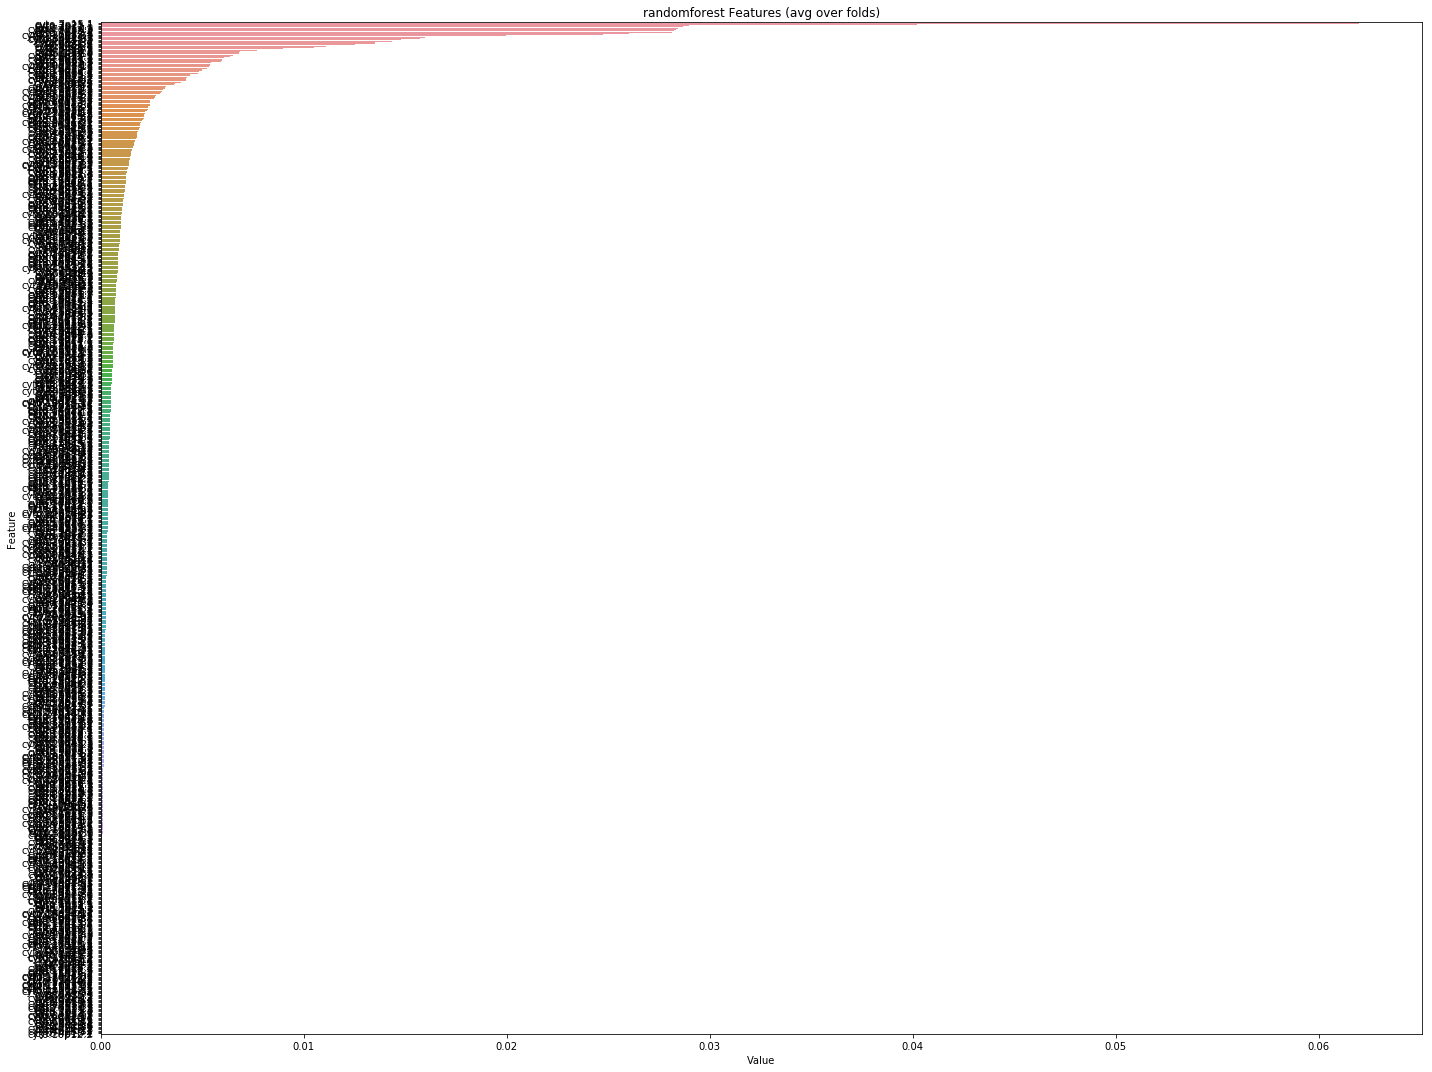

In [39]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(rf1.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('randomforest Features (avg over folds)')
plt.tight_layout()
plt.show()

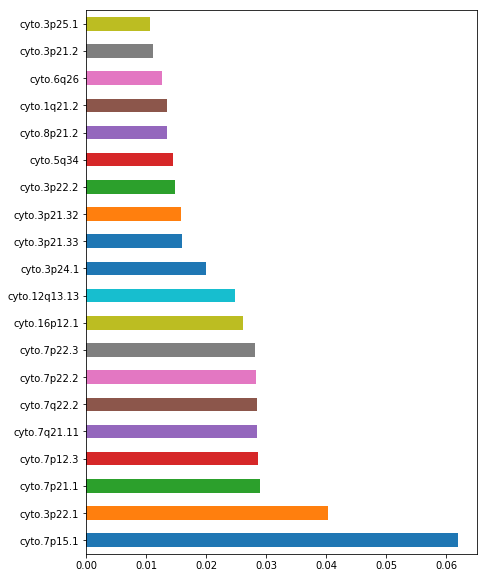

In [42]:
plt.figure(figsize = (7,10))
feat_importances = pd.Series(rf1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [43]:
feat_importances.nlargest(20)

cyto.7p15.1      0.061995
cyto.3p22.1      0.040225
cyto.7p21.1      0.028997
cyto.7p12.3      0.028688
cyto.7q21.11     0.028456
cyto.7q22.2      0.028362
cyto.7p22.2      0.028236
cyto.7p22.3      0.028130
cyto.16p12.1     0.026027
cyto.12q13.13    0.024748
cyto.3p24.1      0.019973
cyto.3p21.33     0.015984
cyto.3p21.32     0.015746
cyto.3p22.2      0.014796
cyto.5q34        0.014373
cyto.8p21.2      0.013510
cyto.1q21.2      0.013510
cyto.6q26        0.012531
cyto.3p21.2      0.011101
cyto.3p25.1      0.010530
dtype: float64

## K100

In [7]:
BC_100 = pd.read_csv('BC_32ea_k100_cyto.csv')
Normal_100 = pd.read_csv('Normal_21ea_k100_cyto.csv')
PC_100 = pd.read_csv('PC_20ea_k100_cyto.csv')
RC_100 = pd.read_csv('RC_20ea_k100_cyto.csv')

In [8]:
#drop person id
BC_100.drop('Unnamed: 0', axis = 1, inplace = True)
Normal_100.drop('Unnamed: 0', axis = 1, inplace = True)
PC_100.drop('Unnamed: 0', axis = 1, inplace = True)
RC_100.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
BC_100['cancer'] = 'BC'
Normal_100['cancer'] = 'normal'
PC_100['cancer'] = 'PC'
RC_100['cancer'] = "RC"

K100 = pd.concat([BC_100,Normal_100,PC_100,RC_100], axis = 0)

In [10]:
rf2 = RandomForestClassifier()
svm2 = SVC()

In [11]:
K100.dropna(inplace=True)

### TCGA 모델로 소변데이터(K100) predict

In [96]:
K100.head()

,id,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,...,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3,<NA>,cancer
0,B001,0.181000,-0.019967,0.044536,-0.026000,0.018065,0.00490,0.048000,0.084,-0.042857,...,0.015217,-0.044152,-0.004636,0.014333,0.0116,-0.004737,-0.019571,-0.022065,-0.7450,BC
1,B002,0.127000,0.010733,0.031250,0.048600,0.084413,0.05160,0.092889,0.102,-0.012857,...,-0.043478,-0.046000,-0.007386,-0.009233,-0.0136,-0.060474,0.027714,0.002290,0.2550,BC
2,B003,0.004000,0.007567,0.024964,0.081200,-0.011391,0.03605,-0.050194,-0.093,-0.059857,...,-0.158783,-0.193576,-0.075977,-0.106667,-0.0114,-0.072421,-0.127714,-0.168903,-0.1360,BC
3,B004,0.135667,0.061467,-0.061286,-0.071733,0.070522,0.06270,0.020556,-0.002,0.050857,...,-0.019326,0.012515,-0.009591,0.016667,0.0438,0.019947,0.011500,0.031387,0.0100,BC
4,B006,-0.251000,-0.134700,-0.175750,-0.165800,-0.112522,-0.06670,-0.127972,0.026,-0.198429,...,-0.074109,0.024758,0.097000,0.018667,0.1170,0.058368,0.038571,0.020065,-0.4595,BC


In [12]:
TCGA2 = TCGA.drop(list(set(TCGA.columns) - set(K100.columns)), axis = 1)

In [13]:
K100_2 = K100.drop(list(set(K100.columns) - set(TCGA.columns)), axis = 1)

In [15]:
K100_2.shape

(88, 762)

In [16]:
K100_2.head()

,cyto.10p11.1,cyto.10p11.21,cyto.10p11.22,cyto.10p11.23,cyto.10p12.1,cyto.10p12.2,cyto.10p12.31,cyto.10p12.32,cyto.10p12.33,cyto.10p13,...,cyto.9q31.3,cyto.9q32,cyto.9q33.1,cyto.9q33.2,cyto.9q33.3,cyto.9q34.11,cyto.9q34.12,cyto.9q34.13,cyto.9q34.2,cyto.9q34.3
0,0.181000,-0.019967,0.044536,-0.026000,0.018065,0.00490,0.048000,0.084,-0.042857,0.01960,...,-0.059844,-0.022250,0.015217,-0.044152,-0.004636,0.014333,0.0116,-0.004737,-0.019571,-0.022065
1,0.127000,0.010733,0.031250,0.048600,0.084413,0.05160,0.092889,0.102,-0.012857,0.07528,...,-0.105219,-0.060821,-0.043478,-0.046000,-0.007386,-0.009233,-0.0136,-0.060474,0.027714,0.002290
2,0.004000,0.007567,0.024964,0.081200,-0.011391,0.03605,-0.050194,-0.093,-0.059857,-0.01634,...,-0.178719,-0.128250,-0.158783,-0.193576,-0.075977,-0.106667,-0.0114,-0.072421,-0.127714,-0.168903
3,0.135667,0.061467,-0.061286,-0.071733,0.070522,0.06270,0.020556,-0.002,0.050857,-0.00038,...,0.003875,-0.077036,-0.019326,0.012515,-0.009591,0.016667,0.0438,0.019947,0.011500,0.031387
4,-0.251000,-0.134700,-0.175750,-0.165800,-0.112522,-0.06670,-0.127972,0.026,-0.198429,-0.00408,...,-0.003344,-0.013250,-0.074109,0.024758,0.097000,0.018667,0.1170,0.058368,0.038571,0.020065


In [14]:
K100['cancer'].value_counts()

BC        32
normal    21
PC        19
RC        16
Name: cancer, dtype: int64

#### cv

In [24]:
for i, (idx_train, idx_cv) in enumerate(cv.split(TCGA2)):
    df_train = TCGA2.iloc[idx_train]
    df_cv = TCGA2.iloc[idx_cv]
    
    x_train = df_train
    y_train = TCGA['y'][idx_train]
    
    x_cv = df_cv
    y_cv = TCGA['y'][idx_cv]
    
    print('[K =',i,']')
    print('svm')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    
    print('random forest')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    
    

[K = 0 ]
svm
train accurcacy = 0.8562724014336918, cv accurcacy = 0.8524355300859598
random forest
train accurcacy = 0.9931899641577061, cv accurcacy = 0.9025787965616046
[K = 1 ]
svm
train accurcacy = 0.8548387096774194, cv accurcacy = 0.8868194842406877
random forest
train accurcacy = 0.9949820788530466, cv accurcacy = 0.9154727793696275
[K = 2 ]
svm
train accurcacy = 0.8652329749103943, cv accurcacy = 0.8409742120343839
random forest
train accurcacy = 0.9949820788530466, cv accurcacy = 0.8968481375358166
[K = 3 ]
svm
train accurcacy = 0.8645646721605159, cv accurcacy = 0.8421807747489239
random forest
train accurcacy = 0.9924758151200287, cv accurcacy = 0.9053084648493543
[K = 4 ]
svm
train accurcacy = 0.8620566105338588, cv accurcacy = 0.8550932568149211
random forest
train accurcacy = 0.994267287710498, cv accurcacy = 0.9110473457675753


### test

In [ ]:
x_train = TCGA2
y_train = TCGA['y']

x_test = K100_2
y_test= K100['cancer']

In [18]:
print('-----------svm2-----------')
svm2.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, svm2.predict(x_train)), accuracy_score(y_test, svm2.predict(x_test))))

print('--------rf2--------')
rf2.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, rf2.predict(x_train)), accuracy_score(y_test, rf2.predict(x_test))))


-----------svm2-----------
train accurcacy = 0.867545871559633, urine accurcacy = 0.07954545454545454
--------rf2--------
train accurcacy = 0.994552752293578, urine accurcacy = 0.19318181818181818


## K15

In [49]:
BC_15 = pd.read_csv('BC_32ea_k15_cyto.csv')
Normal_15 = pd.read_csv('Normal_21ea_k15_cyto.csv')
PC_15 = pd.read_csv('PC_20ea_k15_cyto.csv')

In [50]:
#drop person id
BC_15.drop('Unnamed: 0', axis = 1, inplace = True)
Normal_15.drop('Unnamed: 0', axis = 1, inplace = True)
PC_15.drop('Unnamed: 0', axis = 1, inplace = True)

In [51]:
BC_15['cancer'] = 'BC'
Normal_15['cancer'] = 'normal'
PC_15['cancer'] = 'PC'

K15 = pd.concat([BC_15,Normal_15,PC_15], axis = 0)

In [52]:
K15.dropna(inplace=True)

In [55]:
TCGA.y.value_counts()

Normal    1706
RC         882
PC         492
BC         408
Name: y, dtype: int64

In [77]:
TT = TCGA.loc[TCGA.y != 'RC']

In [78]:
TT.y.value_counts()

Normal    1706
PC         492
BC         408
Name: y, dtype: int64

In [79]:
TT2 = TT.drop(list(set(TT.columns) - set(K15.columns)), axis = 1)

In [80]:
K15_2 = K15.drop(list(set(K15.columns) - set(TT.columns)), axis = 1)

In [81]:
TT2.shape

(2606, 763)

In [82]:
rf1 = RandomForestClassifier()
svm1 = SVC()

In [83]:
TT.columns

Index(['cyto.1p36.32', 'cyto.1p36.31', 'cyto.1p36.23', 'cyto.1p36.22',
       'cyto.1p36.21', 'cyto.1p36.13', 'cyto.1p36.12', 'cyto.1p36.11',
       'cyto.1p35.3', 'cyto.1p35.2',
       ...
       'cyto.9q32', 'cyto.9q33.1', 'cyto.9q33.2', 'cyto.9q33.3',
       'cyto.9q34.11', 'cyto.9q34.12', 'cyto.9q34.13', 'cyto.9q34.2',
       'cyto.9q34.3', 'y'],
      dtype='object', length=787)

In [90]:
for i, (idx_train, idx_cv) in enumerate(cv.split(TT2)):
    df_train = TT2.iloc[idx_train]
    df_cv = TT2.iloc[idx_cv]
    
    x_train = df_train
    y_train = TT['y'].iloc[idx_train]
    
    x_cv = df_cv
    y_cv = TT['y'].iloc[idx_cv]
    
    print('[K =',i,']')
    print('---svm---')
    svm1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_cv, svm1.predict(x_cv))))
    
    print('---random forest---')
    rf1.fit(x_train, y_train)
    print("train accurcacy = {}, cv accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_cv, rf1.predict(x_cv))))
    
    

[K = 0 ]
---svm---
train accurcacy = 0.8771593090211133, cv accurcacy = 0.8448275862068966
---random forest---
train accurcacy = 0.9980806142034548, cv accurcacy = 0.9272030651340997
[K = 1 ]
---svm---
train accurcacy = 0.871462829736211, cv accurcacy = 0.8714011516314779
---random forest---
train accurcacy = 0.9971223021582734, cv accurcacy = 0.9289827255278311
[K = 2 ]
---svm---
train accurcacy = 0.8733812949640288, cv accurcacy = 0.8733205374280231
---random forest---
train accurcacy = 0.99568345323741, cv accurcacy = 0.9404990403071017
[K = 3 ]
---svm---
train accurcacy = 0.874820143884892, cv accurcacy = 0.8541266794625719
---random forest---
train accurcacy = 0.9918465227817745, cv accurcacy = 0.9097888675623801
[K = 4 ]
---svm---
train accurcacy = 0.8700239808153477, cv accurcacy = 0.8848368522072937
---random forest---
train accurcacy = 0.996642685851319, cv accurcacy = 0.9347408829174664


#### test

In [91]:
x_train = TT2
y_train = TT['y']

x_test = K15_2
y_test= K15['cancer']

In [92]:
print('-----------svm1-----------')
svm1.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, svm1.predict(x_train)), accuracy_score(y_test, svm1.predict(x_test))))

print('--------rf1--------')
rf1.fit(x_train, y_train)
print("train accurcacy = {}, urine accurcacy = {}".format(accuracy_score(y_train, rf1.predict(x_train)), accuracy_score(y_test, rf1.predict(x_test))))


-----------svm1-----------
train accurcacy = 0.8787413660782809, urine accurcacy = 0.1111111111111111
--------rf1--------
train accurcacy = 0.9953952417498081, urine accurcacy = 0.3888888888888889
